In [8]:
import xarray as xr
import matplotlib.pyplot as plt

In [9]:
ds = xr.open_dataset("with_otec/prog.nc")
ini = xr.open_dataset("with_otec/MOM_IC.nc")

/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:359: CFWarning: this date/calendar/year zero convention is not supported by CF
  lower = cftime.num2date(vmin, self.date_unit, calendar=self.calendar)
/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:405: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(dt, self.date_unit, calendar=self.calendar)
/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:454: CFWarning: this date/calendar/year zero convention is not supported by CF
  return cftime.date2num(ticks, self.date_unit, calendar=self.calendar)
/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:228: CFWarning: this date/calendar/year zero convention is not supported by CF
  dt = cftime.num2date(x, self.time_units, calendar=self.calendar)


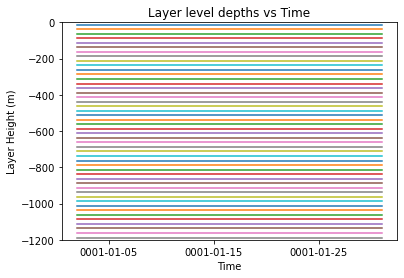

In [10]:
# Graph the depth of each layer over time
ds['eh'] = xr.ones_like(ds['h']) * 0.5*( ds['e'].sel(zi=ds['zi'][1:]).data + ds['e'].sel(zi=ds['zi'][:-1]).data )
eh = ds['eh'].mean(['yh', 'xh'])
for z in ds['zl']:
    eh.sel(zl=z).plot()
    
plt.ylim(-1200, 0)
plt.title("Layer level depths vs Time")
plt.ylabel("Layer Height (m)");

### Evolution of temperature profile

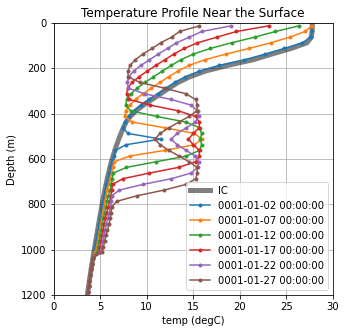

In [11]:
plt.figure(figsize=(5,5))

ini['Temp'].mean(['lath', 'lonh']).plot(y='Layer', color='k', lw=5., alpha=0.5, label="IC")
for t in ds['Time'][::5]:
    plt.plot(ds['temp'].sel(Time=t).mean(['xh', 'yh']), -ds['eh'].sel(Time=t).mean(['xh', 'yh']), marker=".", label=t.to_masked_array())
plt.grid(True)

plt.ylim(1200, 0)
plt.xlim(0, 30)
plt.title("Temperature Profile Near the Surface")
plt.ylabel("Depth (m)")
plt.xlabel("temp (degC)")
plt.legend();

### Show that mass sinks just shift profile towards mass source at rate of $W_{OTEC}$

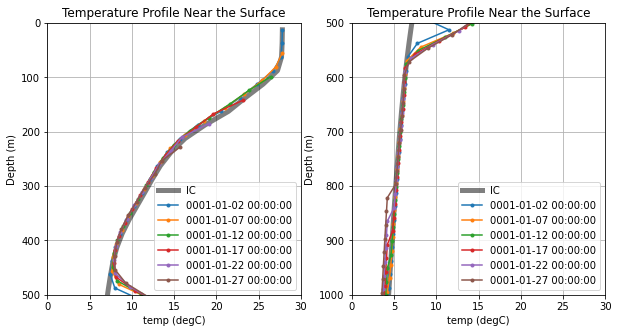

In [12]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
ini['Temp'].mean(['lath', 'lonh']).plot(y='Layer', color='k', lw=5., alpha=0.5, label="IC")
for t in ds['Time'][::5]:
    W = 0.0001
    dH = W * (t - ds['Time'][0]).astype('float64')*1e-9
    plt.plot(ds['temp'].sel(Time=t).mean(['xh', 'yh']), -ds['eh'].sel(Time=t).mean(['xh', 'yh']) + dH, marker=".", label=t.to_masked_array())
plt.grid(True)

plt.ylim(500, 0)
plt.xlim(0, 30)
plt.title("Temperature Profile Near the Surface")
plt.ylabel("Depth (m)")
plt.xlabel("temp (degC)")
plt.legend()

plt.subplot(1,2,2)
ini['Temp'].mean(['lath', 'lonh']).plot(y='Layer', color='k', lw=5., alpha=0.5, label="IC")
for t in ds['Time'][::5]:
    W = 0.0001
    dH = W * (t - ds['Time'][0]).astype('float64')*1e-9
    plt.plot(ds['temp'].sel(Time=t).mean(['xh', 'yh']), -ds['eh'].sel(Time=t).mean(['xh', 'yh']) - dH, marker=".", label=t.to_masked_array())
plt.grid(True)

plt.ylim(1000, 500)
plt.xlim(0, 30)
plt.title("Temperature Profile Near the Surface")
plt.ylabel("Depth (m)")
plt.xlabel("temp (degC)")
plt.legend();

### Evolution of salinity profile

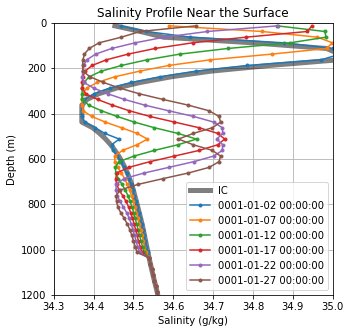

In [13]:
plt.figure(figsize=(5,5))

ini['Salt'].mean(['lath', 'lonh']).plot(y='Layer', color='k', lw=5., alpha=0.5, label="IC")
for t in ds['Time'][::5]:
    plt.plot(ds['salt'].sel(Time=t).mean(['xh', 'yh']), -ds['eh'].sel(Time=t).mean(['xh', 'yh']), marker=".", label=t.to_masked_array())
plt.grid(True)

plt.ylim(1200, 0)
plt.xlim(34.3, 35.0)
plt.title("Salinity Profile Near the Surface")
plt.ylabel("Depth (m)")
plt.xlabel("Salinity (g/kg)")
plt.legend();